The following code provides cleaning of both training and testing dataset to feed into the machine learning algorithms.

From our previous statistical analysis, we found the following important information about the training data:
- No missing values found.
- Target value is 'interest_level' which contains three classes: high, low, medium
- There maybe some outliers in number of bathrooms(i.e., 0 bedrooms, 8 bathrooms), lattitudes & longitude(i.e., (0, 0), (30.4, -119)), prices (10e6). We will get rid of these suspected outliers.
- This code is based on DataCleaning_forML_0.

In [143]:
%matplotlib inline
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [144]:
train = pd.read_json('train.json')
test = pd.read_json('test.json')

### Remove suspected outliers in number of bathrooms.
Given that the dataset are apartment listings, it doesn't make sense to have too many or too few bathrooms. Let's get rid of such examples.

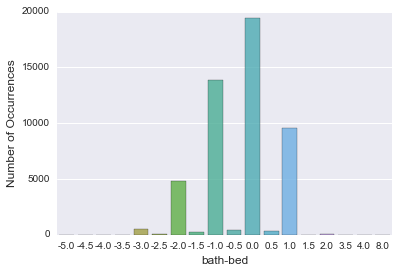

In [145]:
train['bath_bed'] = train['bathrooms'] - train['bedrooms']
cnt_srs = train['bath_bed'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8)
plt.xlabel('bath-bed', fontsize=12)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.show()

In [146]:
train = train[(train['bath_bed'] <= 1) & (train['bath_bed'] >=-4)]
train.drop(['bath_bed'], inplace = True, axis = 1)
# train = train.set_index([[i for i in range(train['bathrooms'].count())]])

### Remove suspected outliers in lattitudes & longitude
These apartments are located in New York city and the latitude and longitude coordinates of New York city are 40.730610, -73.935242. We are not sure whether these apartments should be strictly confined inside of New York city or not. Let's assume not and we can commute 150 miles along all directions, corresponds to ~2.4 degree in latitude and ~3 degree in longitude. That expands the lattitude to 40.73+/-1.2 and longitude to -73.94 +/- 1.5. Data outside of this range are outliers needed to be removed. We further narrow down our interest of scope by visually compare the geographic distribution of these listings and map of New York city.

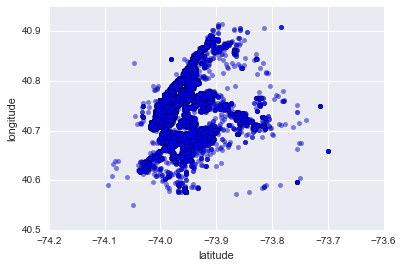

In [147]:
train = train[(train['longitude'] < -73.70) & (train['longitude'] > -74.10) & (train['latitude'] > 40.30) & 
              (train['latitude'] < 40.95)]

plt.scatter(train['longitude'], train['latitude'], c = 'b', alpha = 0.5)
plt.xlabel('latitude')
plt.ylabel('longitude')

### Remove suspected outliers in price.

In [148]:
train = train[(train['price'] >= 300) & (train['price'] <= 20000)]
train = train.set_index([[i for i in range(train['price'].count())]])

### Return and save cleaned training dataset.

In [149]:
train.head(3)

,bathrooms,bedrooms,building_id,created,description,display_address,features,interest_level,latitude,listing_id,longitude,manager_id,photos,price,street_address
0,1.5,3,53a5b119ba8f7b61d4e010512e0dfc85,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,[],medium,40.7145,7211212,-73.9425,5ba989232d0489da1b5f2c45f6688adc,[https://photos.renthop.com/2/7211212_1ed4542e...,3000,792 Metropolitan Avenue
1,1.0,2,c5c8a357cba207596b04d1afd1e4f130,2016-06-12 12:19:27,,Columbus Avenue,"[Doorman, Elevator, Fitness Center, Cats Allow...",low,40.7947,7150865,-73.9667,7533621a882f71e25173b27e3139d83d,[https://photos.renthop.com/2/7150865_be3306c5...,5465,808 Columbus Avenue
2,1.0,1,c3ba40552e2120b0acfc3cb5730bb2aa,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,"[Laundry In Building, Dishwasher, Hardwood Flo...",high,40.7388,6887163,-74.0018,d9039c43983f6e564b1482b273bd7b01,[https://photos.renthop.com/2/6887163_de85c427...,2850,241 W 13 Street


In [150]:
train.isnull().sum()

bathrooms          0
bedrooms           0
building_id        0
created            0
description        0
display_address    0
features           0
interest_level     0
latitude           0
listing_id         0
longitude          0
manager_id         0
photos             0
price              0
street_address     0
dtype: int64

Export to json file. 

Note:data format may change if exported to csv file.

In [151]:
train.to_json('Datacleaned_train.json')